In [85]:
import numpy as np
import pandas as pd

In [86]:
file=pd.read_csv('Churn_Modelling.csv')

In [87]:
file

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [88]:
file.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [89]:
file.shape

(10000, 14)

In [90]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [91]:
file.duplicated().sum()

0

In [92]:
file['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [93]:
file['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [94]:
file['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [95]:
file.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [96]:
file

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [97]:
file=pd.get_dummies(file,columns=['Geography','Gender'],drop_first=True)

In [98]:
file

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [99]:
x=file.drop(columns=['Exited'])

In [100]:
y=file['Exited'].values

In [101]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [102]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [105]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [106]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,0,1,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,0,1


In [107]:
y_train.shape

(8000,)

In [108]:
y_test.shape

(2000,)

In [109]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [110]:
x_train_scaled=scaler.fit_transform(x_train)

In [111]:
x_test_scaled=scaler.fit_transform(x_test)

In [112]:
x_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [113]:
x_test_scaled

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [114]:
x_train_scaled.shape

(8000, 11)

In [115]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [116]:
model=Sequential()

In [117]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [118]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 11)                132       
                                                                 
 dense_15 (Dense)            (None, 11)                132       
                                                                 
 dense_16 (Dense)            (None, 9)                 108       
                                                                 
 dense_17 (Dense)            (None, 5)                 50        
                                                                 
 dense_18 (Dense)            (None, 1)                 6         
                                                                 
Total params: 428
Trainable params: 428
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [120]:
Model=model.fit(x_train_scaled,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
200/200 [==============================] - 2s 5ms/step - loss: 0.5222 - accuracy: 0.7917 - val_loss: 0.4625 - val_accuracy: 0.7969
Epoch 2/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.7958 - val_loss: 0.4443 - val_accuracy: 0.7969
Epoch 3/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.7958 - val_loss: 0.4389 - val_accuracy: 0.7969
Epoch 4/200
200/200 [==============================] - 1s 4ms/step - loss: 0.4306 - accuracy: 0.7958 - val_loss: 0.4350 - val_accuracy: 0.7969
Epoch 5/200
200/200 [==============================] - 2s 8ms/step - loss: 0.4258 - accuracy: 0.7958 - val_loss: 0.4313 - val_accuracy: 0.7969
Epoch 6/200
200/200 [==============================] - 1s 5ms/step - loss: 0.4206 - accuracy: 0.8128 - val_loss: 0.4272 - val_accuracy: 0.8138
Epoch 7/200
200/200 [==============================] - 1s 4ms/step - loss: 0.4141 - accuracy: 0.8180 - val_loss: 0.4203 - val_accuracy: 0.8181

Epoch 58/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3185 - accuracy: 0.8667 - val_loss: 0.3536 - val_accuracy: 0.8562
Epoch 59/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.8691 - val_loss: 0.3551 - val_accuracy: 0.8550
Epoch 60/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.8684 - val_loss: 0.3546 - val_accuracy: 0.8531
Epoch 61/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.8681 - val_loss: 0.3542 - val_accuracy: 0.8569
Epoch 62/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8697 - val_loss: 0.3555 - val_accuracy: 0.8550
Epoch 63/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3163 - accuracy: 0.8694 - val_loss: 0.3551 - val_accuracy: 0.8531
Epoch 64/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3168 - accuracy: 0.8683 - val_loss: 0.3536 - val_accuracy:

Epoch 115/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3095 - accuracy: 0.8712 - val_loss: 0.3630 - val_accuracy: 0.8531
Epoch 116/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3091 - accuracy: 0.8717 - val_loss: 0.3649 - val_accuracy: 0.8494
Epoch 117/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3098 - accuracy: 0.8727 - val_loss: 0.3604 - val_accuracy: 0.8556
Epoch 118/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3097 - accuracy: 0.8705 - val_loss: 0.3616 - val_accuracy: 0.8531
Epoch 119/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3092 - accuracy: 0.8741 - val_loss: 0.3635 - val_accuracy: 0.8581
Epoch 120/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3103 - accuracy: 0.8734 - val_loss: 0.3649 - val_accuracy: 0.8487
Epoch 121/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3083 - accuracy: 0.8728 - val_loss: 0.3630 - val_ac

200/200 [==============================] - 1s 4ms/step - loss: 0.3048 - accuracy: 0.8752 - val_loss: 0.3693 - val_accuracy: 0.8469
Epoch 172/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.8737 - val_loss: 0.3672 - val_accuracy: 0.8525
Epoch 173/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3043 - accuracy: 0.8731 - val_loss: 0.3674 - val_accuracy: 0.8531
Epoch 174/200
200/200 [==============================] - 1s 4ms/step - loss: 0.3045 - accuracy: 0.8741 - val_loss: 0.3671 - val_accuracy: 0.8544
Epoch 175/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3050 - accuracy: 0.8736 - val_loss: 0.3666 - val_accuracy: 0.8500
Epoch 176/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3034 - accuracy: 0.8772 - val_loss: 0.3672 - val_accuracy: 0.8556
Epoch 177/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3042 - accuracy: 0.8761 - val_loss: 0.3681 - val_accuracy: 0.8475

In [125]:
model.layers[4].get_weights()

[array([[ 1.3745334 ],
        [ 2.2469935 ],
        [-0.99450016],
        [-0.912174  ],
        [-0.5976268 ]], dtype=float32),
 array([-0.04408152], dtype=float32)]

In [126]:
y_predict=model.predict(x_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [127]:
y_predict

array([[0.16300838],
       [0.18793719],
       [0.16450585],
       ...,
       [0.08960948],
       [0.10442231],
       [0.05945   ]], dtype=float32)

In [128]:
y_predict.shape

(2000, 1)

In [129]:
x_test_scaled.shape

(2000, 11)

In [130]:
y_predicted=np.where(y_predict>0.5,1,0)

In [133]:
y_predicted

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.8515

In [135]:
import matplotlib.pyplot as plt

In [139]:
Model.history

{'loss': [0.5221972465515137,
  0.44776591658592224,
  0.43642154335975647,
  0.43062523007392883,
  0.4257824420928955,
  0.420564204454422,
  0.4140942096710205,
  0.4061082899570465,
  0.3916308581829071,
  0.3723907172679901,
  0.3614826202392578,
  0.3544505834579468,
  0.3497272729873657,
  0.34620335698127747,
  0.34454110264778137,
  0.3419407904148102,
  0.3399593234062195,
  0.33886396884918213,
  0.3370940387248993,
  0.33545973896980286,
  0.33448827266693115,
  0.33435264229774475,
  0.33207952976226807,
  0.33249300718307495,
  0.33117297291755676,
  0.330689400434494,
  0.33016282320022583,
  0.3292129933834076,
  0.3287156820297241,
  0.32840320467948914,
  0.3276047110557556,
  0.3275481164455414,
  0.32694777846336365,
  0.3254992663860321,
  0.3257330358028412,
  0.32569295167922974,
  0.32515430450439453,
  0.32475781440734863,
  0.32421424984931946,
  0.32364213466644287,
  0.32392027974128723,
  0.3229886293411255,
  0.3231065273284912,
  0.32343196868896484,
  0.

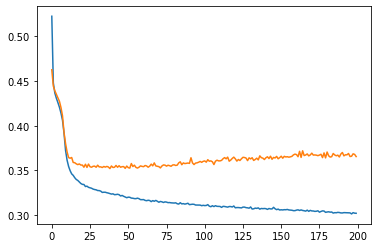

In [137]:
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])

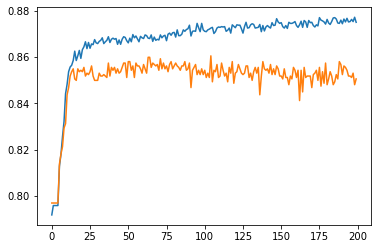

In [140]:
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])